In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bank=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/BankChurners7.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
bank.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [4]:
numcols=bank.select_dtypes(include=['int','float']).columns.to_list()

In [5]:
catcols=bank.select_dtypes('object').columns.to_list()

In [6]:
len(numcols)

14

In [7]:
numcols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [8]:
len(catcols)

6

In [9]:
catcols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [10]:
bank.shape

(10127, 20)

In [11]:
bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Univariate analysis

In [12]:
for col in catcols:
    print(bank[col].value_counts().to_frame())
    

                   count
Attrition_Flag          
Existing Customer   8500
Attrited Customer   1627
        count
Gender       
F        5358
M        4769
                 count
Education_Level       
Graduate          3128
High School       2013
Unknown           1519
Uneducated        1487
College           1013
Post-Graduate      516
Doctorate          451
                count
Marital_Status       
Married          4687
Single           3943
Unknown           749
Divorced          748
                 count
Income_Category       
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
               count
Card_Category       
Blue            9436
Silver           555
Gold             116
Platinum          20


In [13]:
bank.loc[bank['Education_Level'].isin(['College','Post-Graduate','Doctorate']),'Education_Level']='Graduate'

In [14]:
bank.replace({'Education_Level': {'High School': 'Uneducated'}}, inplace=True)

In [15]:
bank['Education_Level'].value_counts()

Education_Level
Graduate      5108
Uneducated    3500
Unknown       1519
Name: count, dtype: int64

In [16]:
bank.replace({'Marital_Status':{'Divorced':'Single'}},inplace=True)

In [17]:
bank['Marital_Status'].value_counts()

Marital_Status
Single     4691
Married    4687
Unknown     749
Name: count, dtype: int64

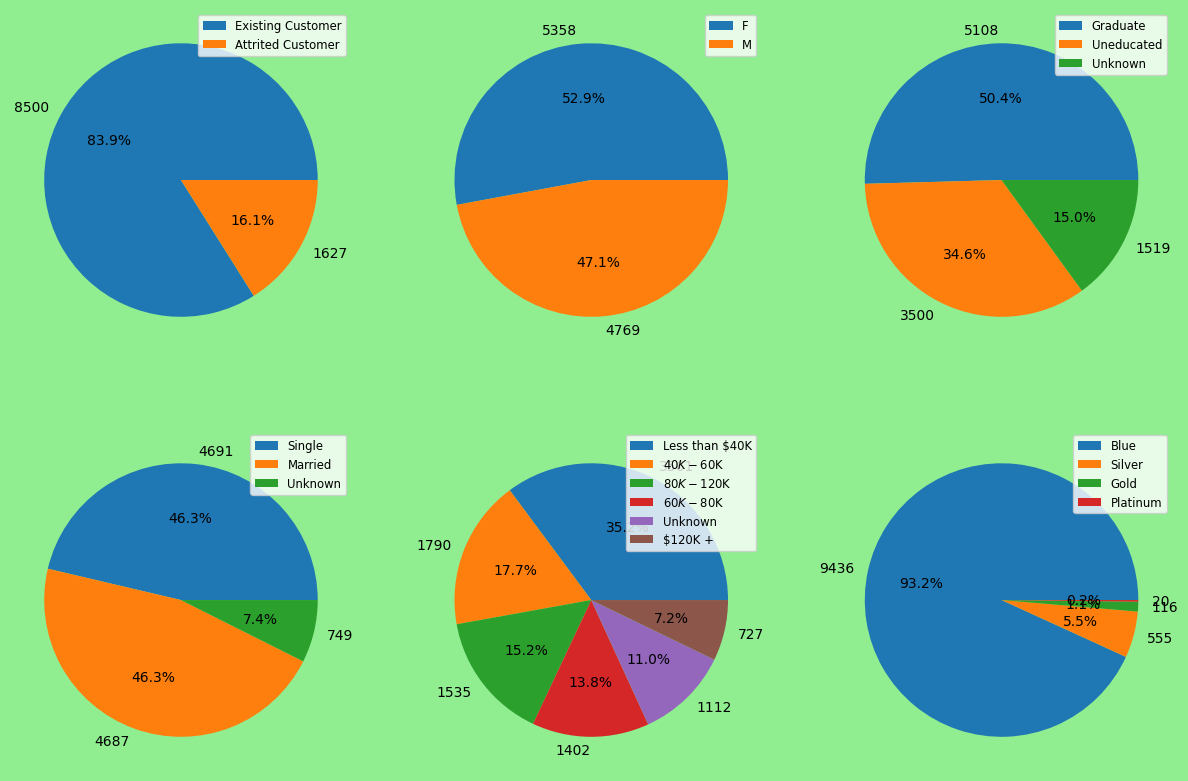

In [18]:
fig,ax=plt.subplots(2,3,figsize=(15,10),facecolor='lightgreen')
ax=ax.flatten()
for i,col in enumerate(catcols):
    ax[i].pie(x=bank[col].value_counts(),data=bank,labels=bank[col].value_counts(),autopct='%1.1f%%')
    ax[i].legend(bank[col].value_counts().index,loc='upper right',fontsize='small')
    

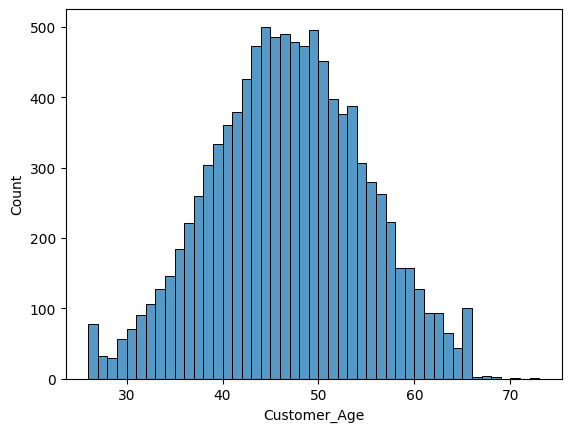

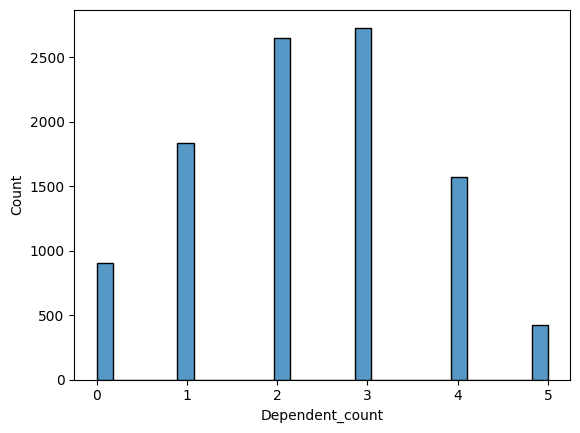

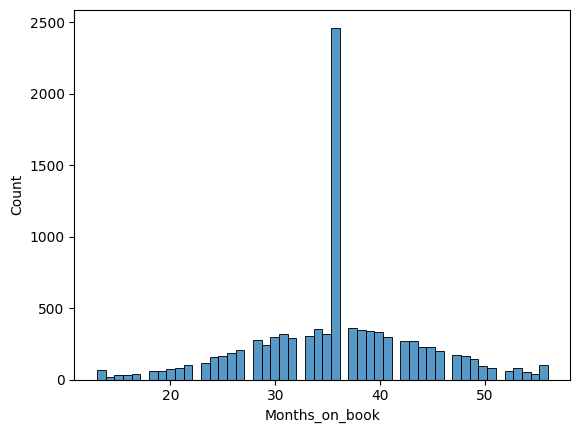

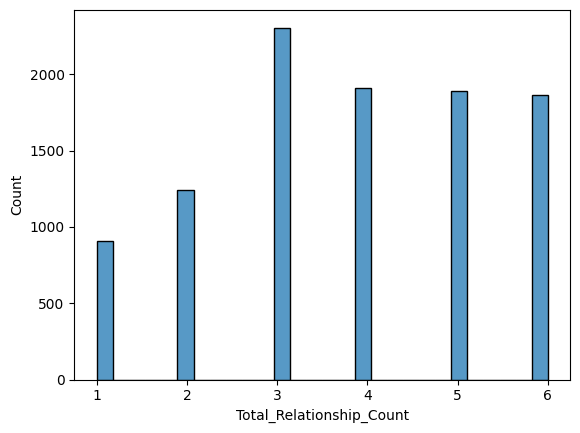

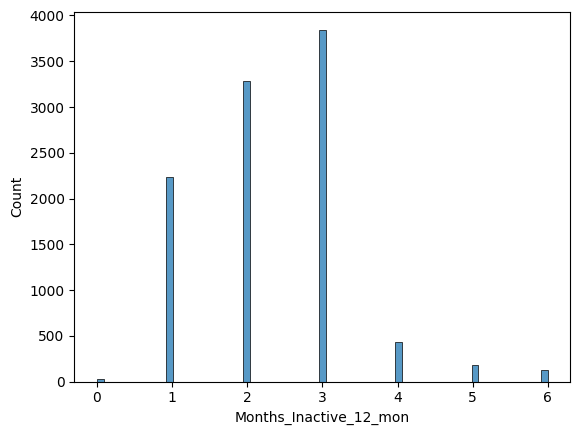

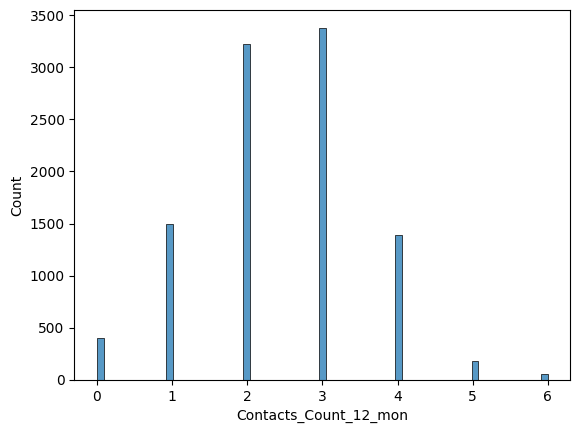

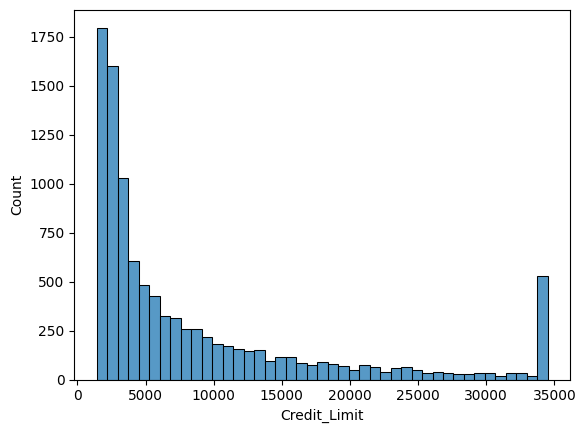

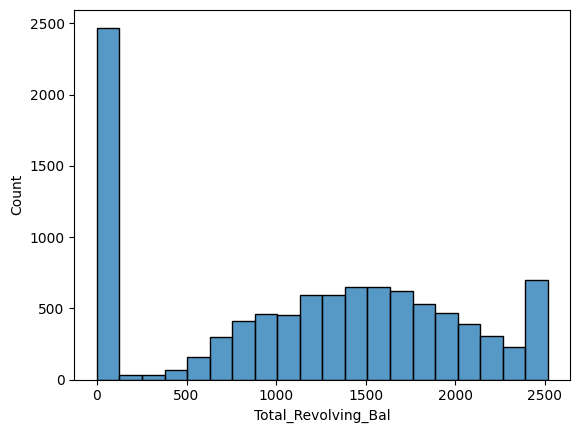

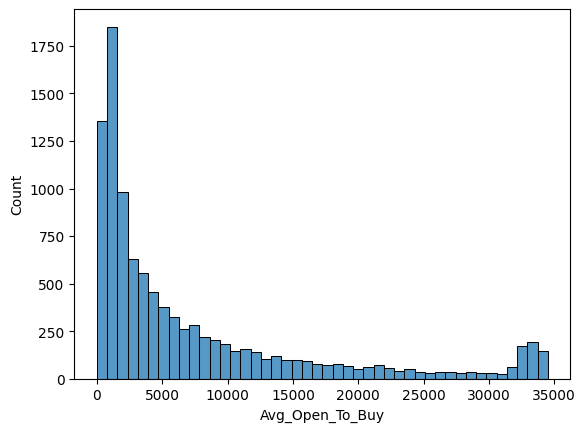

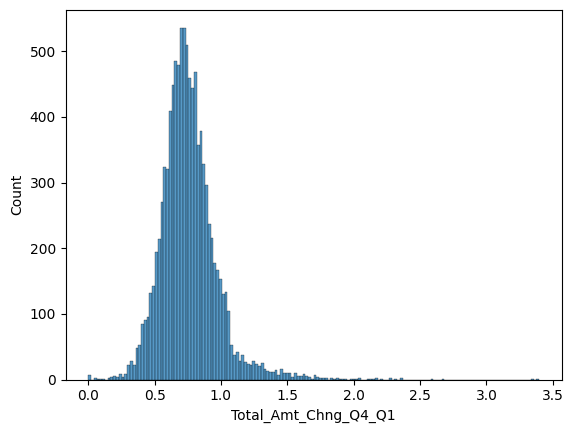

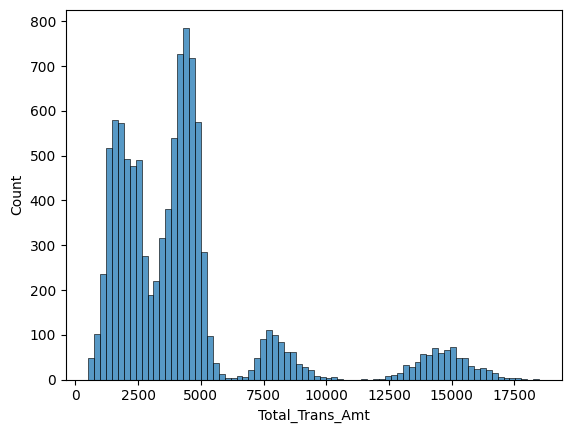

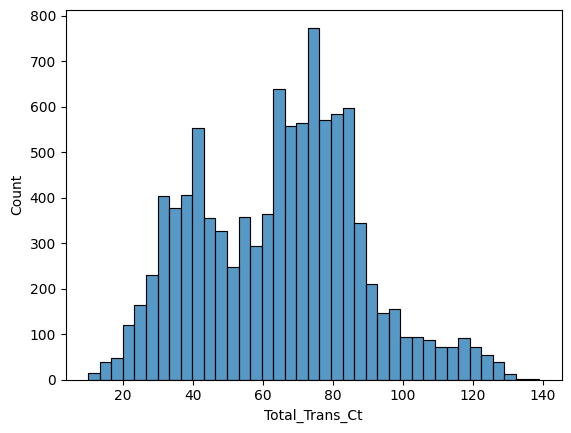

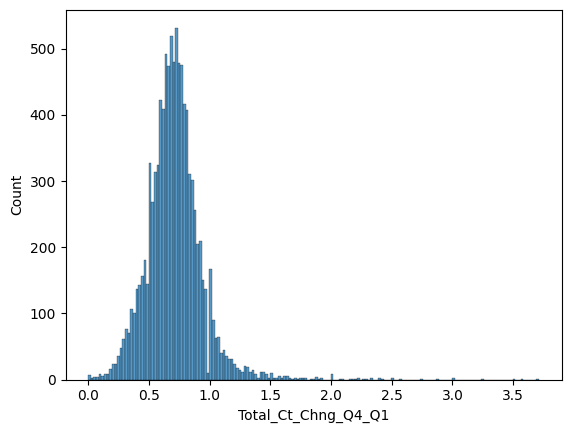

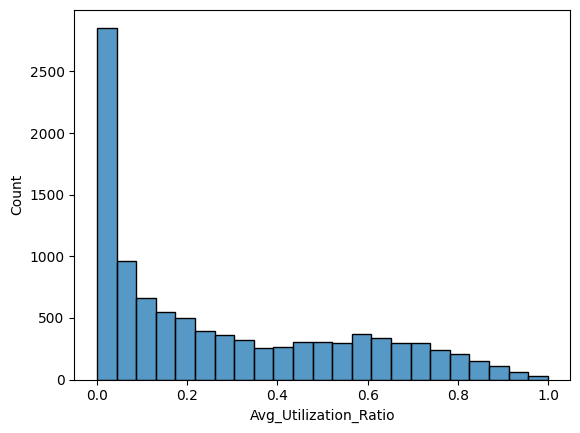

In [19]:
for col in numcols:
    sns.histplot(x=col,data=bank,)
    plt.show()

## Bivariate analysis


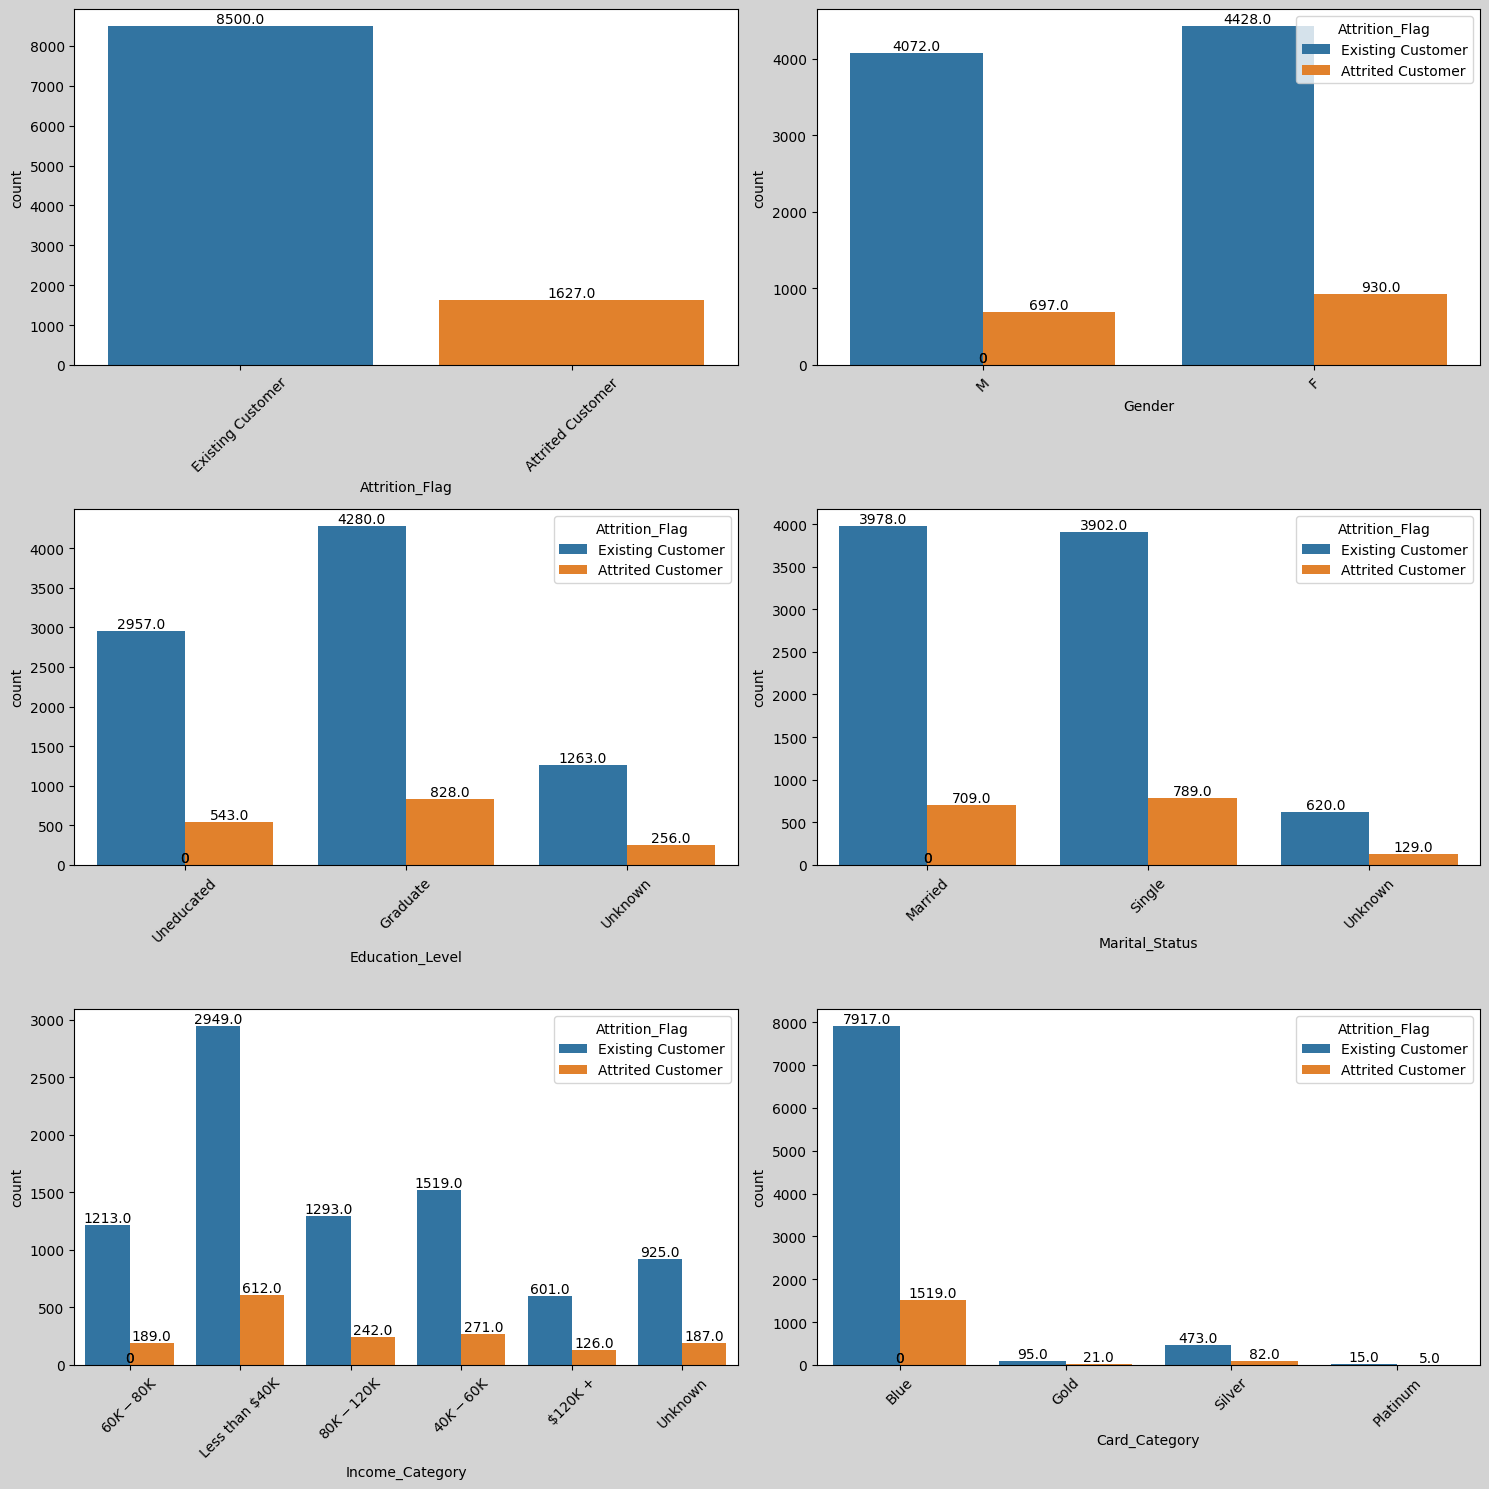

In [20]:
fig,ax=plt.subplots(3,2,figsize=(15,15),facecolor='lightgray')
ax=ax.flatten()
for i,col in enumerate(catcols):
    sns.countplot(x=col,data=bank,hue='Attrition_Flag',ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45)
    for p in ax[i].patches:
       ax[i].annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center',xytext = (0, 5),textcoords = 'offset points')                 
plt.tight_layout()
plt.show()

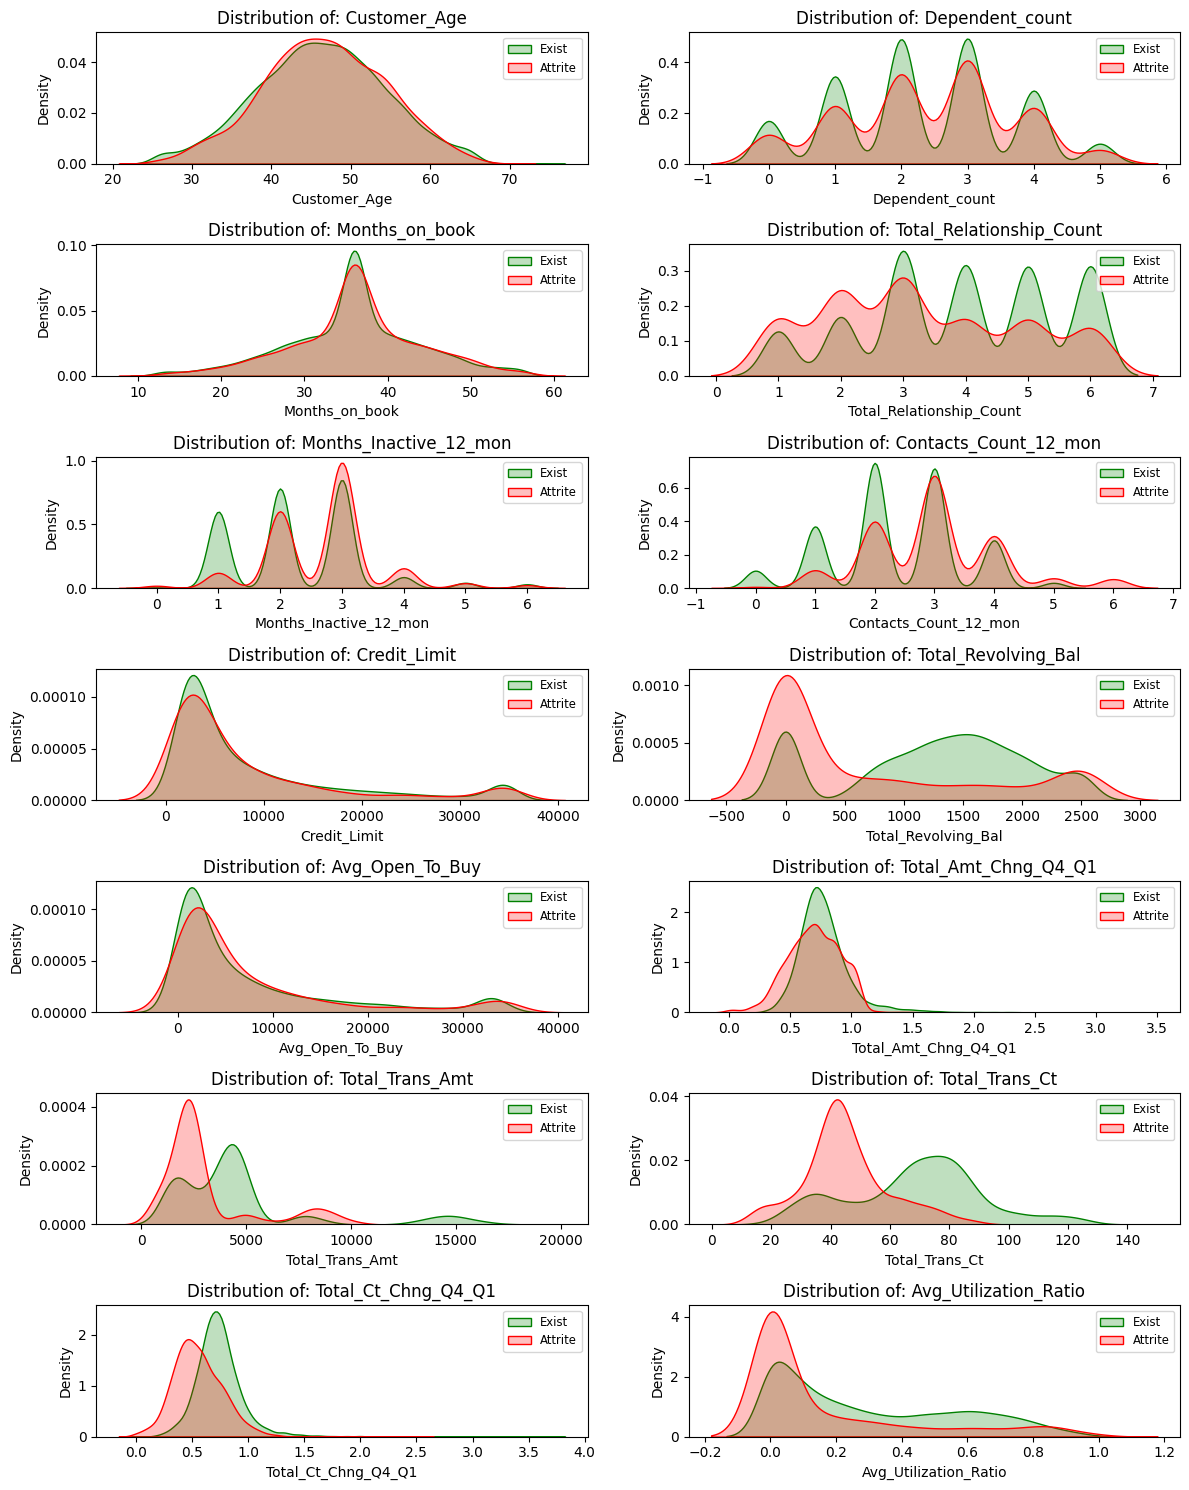

In [21]:
fig,ax=plt.subplots(7,2,figsize=(12,15))
ax=ax.flatten()                              
for i,col in enumerate(numcols):
    sns.kdeplot(bank[col][bank['Attrition_Flag']=='Existing Customer'],fill=True,ax=ax[i],color='g')
    sns.kdeplot(bank[col][bank['Attrition_Flag']=='Attrited Customer'],fill=True,ax=ax[i],color='r')
    ax[i].legend(['Exist','Attrite'],fontsize='small')
    ax[i].set_title('Distribution of: {}'.format(col))
plt.tight_layout()
plt.show()
    

In [22]:
#obs: who are more prone to attrition::
##==========================================
#more than 3 month inactivity
#those with total transactions amount less than 5000(0 to 5k has more attrition rate)
#with avg utilzatn ration very less
# those with lesser transaction count
#those who contacted the bank more than 3 times
#lesser total rev balance
#lesser relationship accounts with the bank

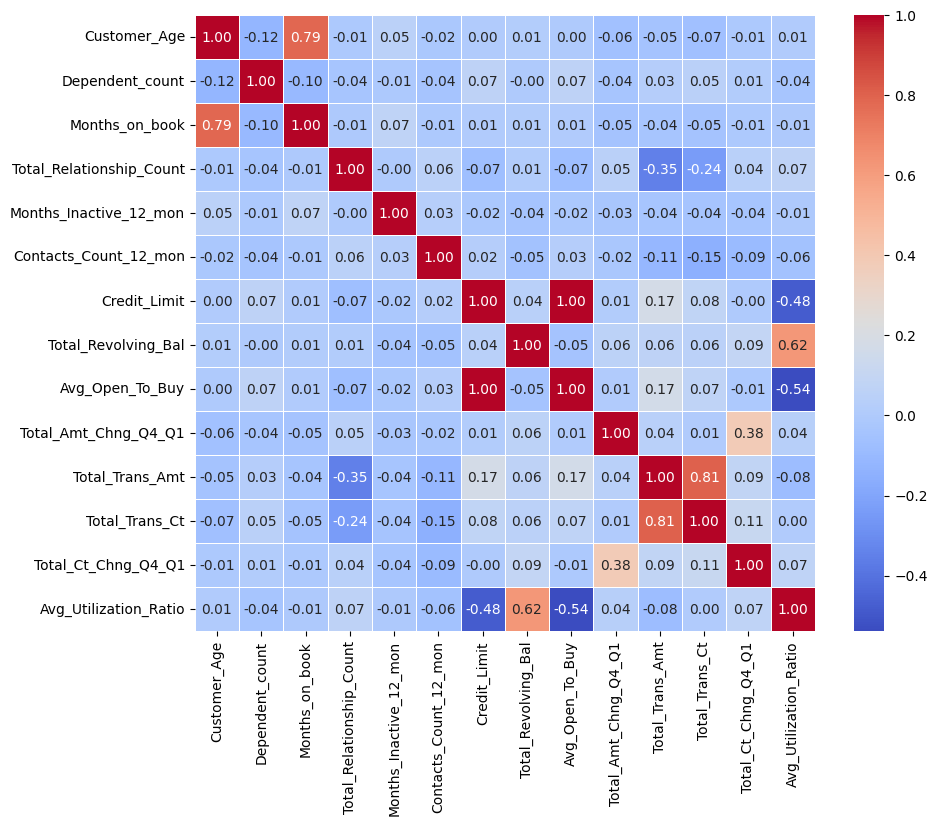

In [23]:
corr_matrix=bank[numcols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=0.7)
plt.show()

In [24]:
#obs
#people with more age , tend to be with the bank for many months
#a person trans count depends on how much money he has in his account(transaction amount) usually more money ,more transactions counts
#revolving balance (the due amt to be paid on credit,will be linked with utilization ratio)
#=lower revolving balance (high credit withdrawal)= high utilization(so is the ratio)
#Credit limit and open to buy are directly related.(based on limit only we can buy)

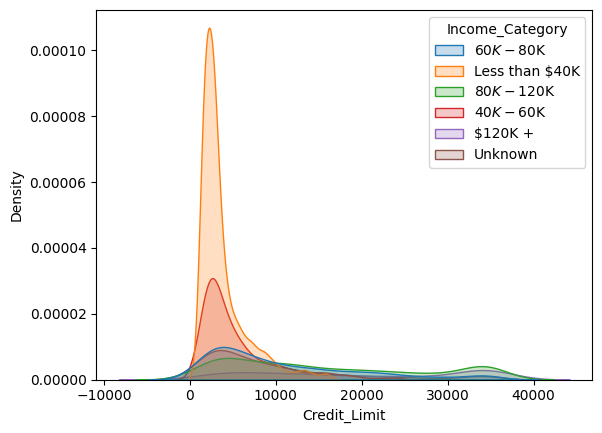

In [25]:
sns.kdeplot(x='Credit_Limit',data=bank,hue='Income_Category',fill=True)
plt.show()

## Feature Engg

In [26]:
bank.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
bank['encoded_Gender']=encoder.fit_transform(bank[['Gender']])

C:\Users\kalya\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoded_data=ohe.fit_transform(bank[['Education_Level','Income_Category','Card_Category','Marital_Status']]).toarray()
encoded_bank=pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out(['Education_Level','Income_Category','Card_Category','Marital_Status']))
bank=pd.concat([bank,encoded_bank],axis=1)
bank.drop(['Education_Level','Income_Category','Card_Category','Marital_Status','Gender'],axis=1,inplace=True)

In [29]:
dictt={'Existing Customer':1,'Attrited Customer':0}
bank['Attrition_Flag']=bank['Attrition_Flag'].map(dictt)

In [30]:
bank.drop(columns=['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Open_To_Buy','Customer_Age','Total_Trans_Amt','Total_Revolving_Bal'],inplace=True)

In [38]:
bank.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Ct,Avg_Utilization_Ratio,encoded_Gender,Education_Level_Graduate,...,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag
0,3,39,5,1,3,12691.0,42,0.061,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,5,44,6,1,2,8256.0,33,0.105,0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,3,36,4,1,0,3418.0,20,0.000,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,4,34,3,4,1,3313.0,20,0.760,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,3,21,5,1,0,4716.0,28,0.000,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [32]:
columns_needed=list(bank.columns.drop('Attrition_Flag'))+['Attrition_Flag']
bank=bank.reindex(columns=columns_needed)

In [33]:
X=bank.iloc[:,:-1].values
y=bank.iloc[:,-1].values

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)
from sklearn.metrics import accuracy_score,classification_report

In [36]:
models={
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVM':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

In [37]:
for model_name,model in models.items():
    print(f"Model {model_name}...")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.3f}")
    print(classification_report(y_test,y_pred))
    print("======================================================================")

Model Logistic Regression...
Accuracy of Logistic Regression: 0.883
              precision    recall  f1-score   support

           0       0.67      0.45      0.54       309
           1       0.91      0.96      0.93      1717

    accuracy                           0.88      2026
   macro avg       0.79      0.70      0.73      2026
weighted avg       0.87      0.88      0.87      2026

Model KNN...
Accuracy of KNN: 0.876
              precision    recall  f1-score   support

           0       0.68      0.35      0.46       309
           1       0.89      0.97      0.93      1717

    accuracy                           0.88      2026
   macro avg       0.79      0.66      0.70      2026
weighted avg       0.86      0.88      0.86      2026

Model SVM...
Accuracy of SVM: 0.902
              precision    recall  f1-score   support

           0       0.81      0.47      0.59       309
           1       0.91      0.98      0.94      1717

    accuracy                           0.9